In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

# 1. Business case
As the official description suggests, we are provided with a dataset containing a chemical analysis of wines produced in the same region of Italy by three different winemakers. Our goal is to find a model that is able to understand who owns a wine. This means that we are faced with  classification problem. <br>

In order to create such model, we are provided with 13 typical characteristics of wines:
- Alcohol
- Malic Acid
- Ash
- Alcalinity of Ash
- Magnesium 
- Total Phenols
- Flavanoids
- Nonflavanoid Phenols
- Proanthocyanins 
- Colour Intensity  
- Hue
- OD280/OD315 of diluted wines
- Proline         

Considering the situation, the best metric to use here is the accuracy (that is, the percentage of labels that are rightly predicted).
Below we can see the first lines of the dataframes. The last column (class) represents the belonging to one of three categories (0, 1, 2) which represent the three winemakers.

In [3]:
df = pd.DataFrame(wine['data'], columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
                                          'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
                                          'colour_intensity', 'hue', 'OD280/OD315_of_diluted_wines', 'proline'])
df['class'] = wine['target']

X = df.iloc[:,:-1]
y = df['class']

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,colour_intensity,hue,OD280/OD315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# 2. Data Exploration Analysis - EDA
Before starting modelling, we need some insight of the data, in order to understand where we must intervene and if some feature engineering is required to improve the information provided by the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   colour_intensity              178 non-null    float64
 10  hue                           178 non-null    float64
 11  OD280/OD315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

We can see from the table above that there are no missing values, and since each feature is continuous, the values types are fine.
The next step is to check whether the classes are balanced or not.

In [5]:
df['class'].value_counts(normalize = True)

1    0.398876
0    0.331461
2    0.269663
Name: class, dtype: float64

There is a slight predomincance of Class 1, but there are no major imbalances. This means that we do not need to resample the dataset.<br>
This is quite fortunate, because we do not have many instances, and if we were to remove samples from the majority class, we would face high inforation loss, and if we were to add more examples from the minority class (e.g. duplicating random records), we would probably face overfitting.<br>

## 2.1. Check correlations
We are now checking whether features selection or reduction is necessary. We plot a heatmap showing the correlations of each feature to check if there are features that might give the same information.

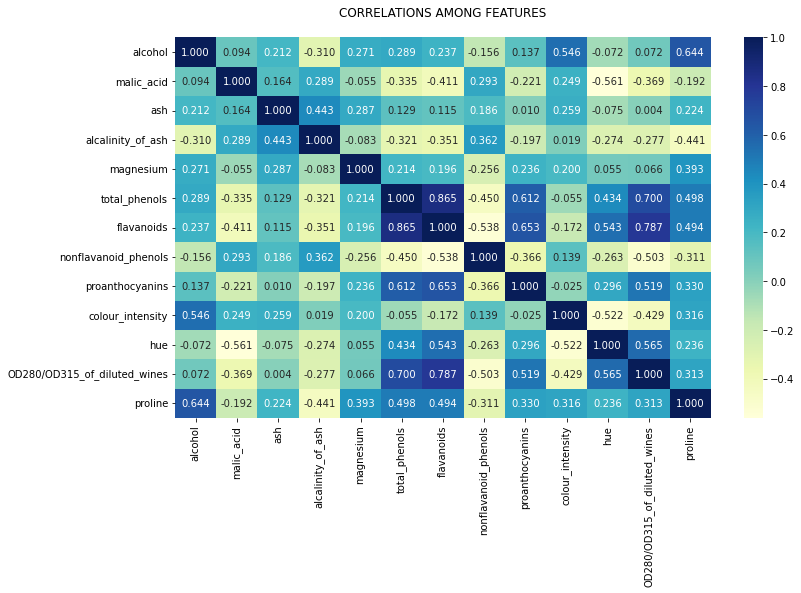

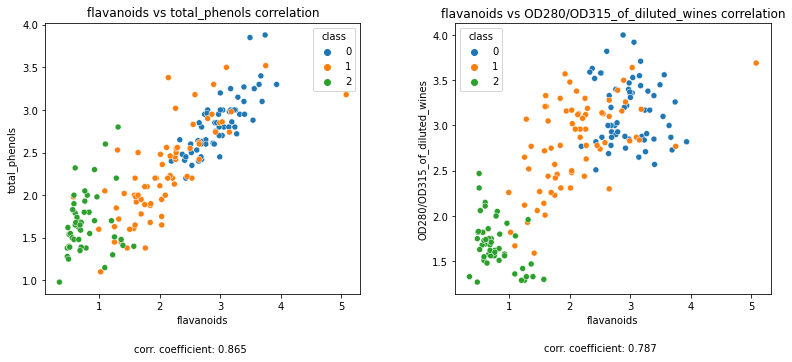

In [6]:
plt.figure(figsize = (12,7))
plt.title('CORRELATIONS AMONG FEATURES\n')
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu", fmt='.3f')
plt.show()
print()


fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.subplots_adjust(wspace=0.3)

sns.scatterplot(x = df['flavanoids'], y = df['total_phenols'], 
                hue = df['class'], palette = 'tab10', ax = ax[0])
ax[0].set_title('flavanoids vs total_phenols correlation')
ax[0].text(2.5, 0.15, 'corr. coefficient: {}'.format(np.around(np.corrcoef(
    df['flavanoids'], df['total_phenols'])[0,1], 3)), horizontalalignment='center')

sns.scatterplot(x = df['flavanoids'], y = df['OD280/OD315_of_diluted_wines'], 
                hue = df['class'], palette = 'tab10', ax = ax[1])
ax[1].set_title('flavanoids vs OD280/OD315_of_diluted_wines correlation')
ax[1].text(2.5, 0.5, 'corr. coefficient: {}'.format(np.around(np.corrcoef(
    df['flavanoids'], df['OD280/OD315_of_diluted_wines'])[0,1], 3)), horizontalalignment='center')

plt.show()

Some features have quite high linear correlations:

- **flavanoids** and  **total phenols** have a corr. coefficient = 0.865
- **flavanoids** and **OD280/OD315_OF_DILUTED_WINES** have a corr. coefficient = 0.787

This means that we could keep **Flavanoids** and get rid of **total phenols** and **OD280/OD315_OF_DILUTED_WINES**. Considering **total phenols**, this correlation is probably related to the fact that it is the sum of Flavanoids, Nonflavanoid Phenols, and Proanthocyanins. In fact there is also a slight correlation among them.
In case we needed to proceed for feature selection or for dimensionality reduction (e.g. Principal Component Analysis), we should keep in mind what we just discovered.<br>
However, as we have written above, the dataset is already small and the number of characteristics is not very high, so we will firstly avoid using such techniques, we will analize the accuracy of the algorithms, and eventually we will decide whether they are needed.<br>

## 2.2. Standardization
Many classification algorithms need standardized data to make computations, in order to avoid creating a low performance model. Indeed, they suffer from curse of dimensionality; that is, computation would take much more time and the results could be biased by the different dimensions of the features.<br>
To avoid such situation, we check the distribution of the features:

In [7]:
df.describe().loc[['min', 'max', 'mean', 'std']].T

,min,max,mean,std
alcohol,11.03,14.83,13.000618,0.811827
malic_acid,0.74,5.80,2.336348,1.117146
ash,1.36,3.23,2.366517,0.274344
alcalinity_of_ash,10.60,30.00,19.494944,3.339564
magnesium,70.00,162.00,99.741573,14.282484
total_phenols,0.98,3.88,2.295112,0.625851
flavanoids,0.34,5.08,2.029270,0.998859
nonflavanoid_phenols,0.13,0.66,0.361854,0.124453
proanthocyanins,0.41,3.58,1.590899,0.572359
colour_intensity,1.28,13.00,5.058090,2.318286


There are some big imbalances in the features. Especially, we can see that the max value of **Proline** is 1680, whole the max value of **nonflavanoid_phenols** is just 0.66. In other words, we need to standardize the data.

# 3. Creating Models
Before proceeding with the standardization, we prepare a function for adressing the accuracy of the models, and we store them and their cross-validation results, so that we can compare their performances:

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a function to simplify the evaluation of the models we are going to use
# It takes the model, X_train, X_test and the search_space (that is, the parameters to compute the GridSearchCV
# for the model and find the best one and its best parameters)
def evaluate_model (model, X_train, X_test, search_space):
    
    model_name = model.__class__.__name__
    
    # Use StratifiedKFold instead of simple Kfold to get sets that contains approximately the same percentage of
    # samples of each target. In fact, we don't have many instances and if we didn't specify this, we could
    # face some samples that don't have each label
    cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

    # Use GridSearchCV to go through the search_space and find the best parameters for the given model
    clf = GridSearchCV(model, param_grid = search_space, 
                                  cv = cv, scoring = 'accuracy').fit(X_train, y_train)

    # print(clf_GaussianNB.best_params_)
    # print(clf_GaussianNB.best_score_)

    # the GridSearchCV returns the best_estimator_ that gives back the best score (accuracy_score)
    model = clf.best_estimator_
    # we fit the model with the train dataset
    model.fit(X_train, y_train)
    # make predictions on the test dataset (which is used as validation dataset)
    predicts = model.predict(X_test)
    
    # Compute the cross-validation on the best_estimator_
    cv_results = cross_validate(model, X_train, y_train, cv = cv, 
                                               scoring = 'accuracy')

    # Report the results of the cross validation, showing the mean and the standard deviation
    print('{model_name} mean accuracy: {acc:.3f}, with a standard deviation of: {std:.3f}'
          .format( 
              model_name = model_name,
              acc = cv_results['test_score'].mean(), 
              std = cv_results['test_score'].std()))
    print()

    # Report the accuracy of the test (validation) dataset
    print('{} performance on test set:'.format(model_name))
    print()
    print(classification_report(y_test, predicts, labels=[0,1,2]))
    print('Overall accuracy: {:.3f}'.format(accuracy_score(y_test, predicts)))

    plt.figure(figsize=(5,3))
    # Plot the confusion matrix for the test (validation) dataset
    sns.heatmap(confusion_matrix(y_test,predicts), cmap="YlGnBu", annot = True)
    plt.title('{} Confusion Matrix on test set'.format(model_name))
#     plt.title('Confusion Matrix on test set')
    plt.show()
    
    # Return the best_estimator_ and the cross_validation results
    return model, cv_results

## 3.1. GaussianNB
The first model we try is the GaussianNB. It is based on the assumption that each label draws a gaussian distribution. In fact, it is a really simple model that only needs the mean and the standard deviation of each label. The process is straightforward: we get a new instance and the model assigns the label based on the distances from the distributions. The nearest one is the label for the new entry.<br>
We try this algorithm because it is very simple and very fast at training and predicting, and give a probabilistic prediction, which can be useful.<br>
If we were to get very good results, we would have a very performant model.

GaussianNB mean accuracy: 0.960, with a standard deviation of: 0.044

GaussianNB performance on test set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Overall accuracy: 0.981


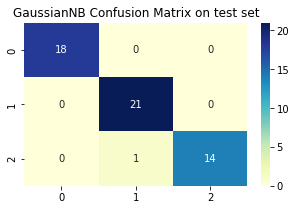

In [28]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

model = GaussianNB()
search_space={'var_smoothing': np.logspace(0,-9, num=100)}

model_GaussianNB, cv_results_GaussianNB = evaluate_model(model, X_train, X_test, search_space)

As we hoped, the model has high accuracy - an average of 96% of cross validation - therefore we already have a very good model which we now will continue to be fast even if we were to make computations on a lot of new entries.<br>
Anyway, before accepting it, we wanto to try some other models and compare them. In order to do that, we now need to standardize the data.

In [29]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

#scaling the data to equalise min and max of each feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# I do the scaler fitting on the training data only
# on the training test I do fit and transform simultaneously
X_train_standard = scaler.fit_transform(X_train)

#now that the scaler has been trained on the training data, I do the transform on the test set
#The reason I fit the scaler using only the training data is because I don't want to bias the model 
# with information from the test data.
X_test_standard = scaler.transform(X_test)
#You should apply fit_transform on the training set and only transform on the validation/test set.
#This is done because the validation/test data is meant to emulate data the model has not seen before. 
#So to fit the validation/test data, we use what was fitted on the training data by using just transform, 
#which should also be applied to new data that will be fed into the model.

# we cannot use the fit() method on the test dataset, because it will be the wrong approach as it 
# could introduce bias to the testing dataset

## 3.2. K-Nearest Neighbors (KNN)
We try KNN because it is a memory-based approach and immediately adapts as we collect new training data. This can be useful since we expect to face new wines over time that will probably have similar chemical characteristics.<br>
By saying "memory-based" we mean that the algorithm perfectly remembers the position of each instance and compare the new entry with others, trying to figure out which are the ones to which it looks like the most. On the other hand, this is also what leads to its main disadvantages: if the dataframe becomes too large, computations could take a lot.

KNeighborsClassifier mean accuracy: 0.952, with a standard deviation of: 0.048

KNeighborsClassifier performance on test set:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Overall accuracy: 0.963


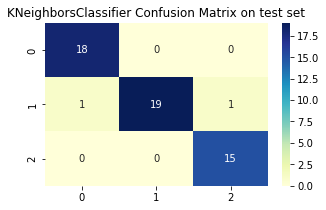

In [30]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

search_space={'n_neighbors': [4,5,6,7],
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski', 'euclidean', 'manhattan']
             }

model_KNN, cv_results_KNN = evaluate_model(model, X_train_standard, X_test_standard, search_space)


The performance of the model is slightly worse than GaussianNB's, so we will probably skip this method and use another one.

## 3.3. Support Vector Machine (SVC)
SVM works on putting a line to separe the classes. This means that it could have some problems when trying to find a margin of separation when classes are overalapping. However, the GaussianNB made a great job, thus suggesting that there is a clear separation between them.<br>
Moreover, while we need to attune many parameters, once we have done that, the model is very fast at making predictions, since it just needs to remember the position of the separation lines.

SVC mean accuracy: 0.976, with a standard deviation of: 0.036

SVC performance on test set:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Overall accuracy: 0.981


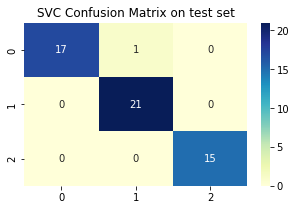

In [31]:
from sklearn.svm import SVC

model = SVC()

search_space = {'C': np.linspace(0.1, 100, num = 50), 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3,4,5]
}

model_SVC, cv_results_SVC = evaluate_model(model, X_train_standard, X_test_standard, search_space)

The results impressive; the average accuracy is 97.6% with a very low standard deviation (just 0.3%). This means that for each test, it got wrong only 1-2 wines.
## 3.4. Logistic Regression
The final algorithm we want to test is the logistic regression because it is one of the most popular models used in industry, meaning that there is a lot of support in the sector. It does not only work on guessing the class of a new wine, but it also gives a probability of belonging, as the GaussianNB does, which can be an important information to know.
Moreover, it works very well with simple datasets (which seems to be the case) and tells how important each feature is for choosing a label, meaning that we can undestand which are the main differences between the wines.

LogisticRegression mean accuracy: 0.976, with a standard deviation of: 0.036

LogisticRegression performance on test set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Overall accuracy: 1.000


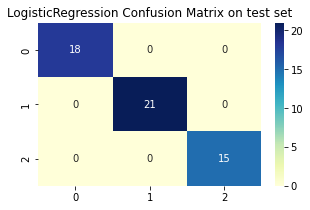

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

search_space = {
    'C' : np.linspace(0.1, 100, num = 100),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']
               }

model_LogisticRegression, cv_results_LogisticRegression = evaluate_model(model, X_train_standard, 
                                                                         X_test_standard, search_space)

The model has the same accuracy of the SVC. It performed better on the test set, but this is just one case, we won't know the data the model will face in the feature, therefore the average accuracy is more important
# 4. Compare the performances of the models
In order to compare the models, we need to plot two charts: the first will show the average prediction time, while the other will show the accuracy distribution.

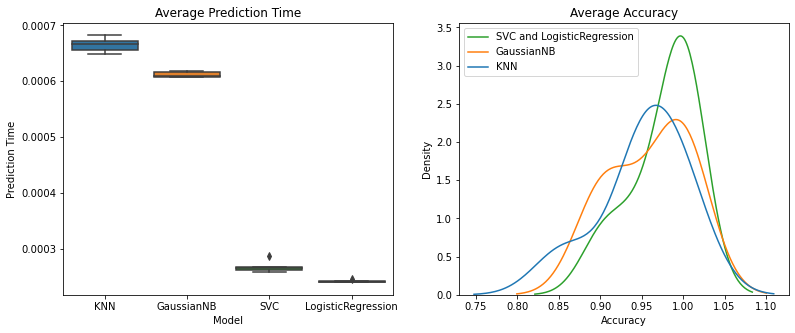

,mean,std
model,,
GaussianNB,0.960,0.048
KNN,0.952,0.052
LogisticRegression,0.976,0.040
SVC,0.976,0.040


In [33]:
# Create a dataframe with the results of the cross_validation of each model
cv_results = pd.concat([
    pd.DataFrame({ 'test_score':cv_results_KNN['test_score'], 
                  'score_time':cv_results_KNN['score_time'],
                  'model':['KNN', 'KNN', 'KNN', 'KNN', 'KNN', 'KNN']}),
    pd.DataFrame({ 'test_score':cv_results_GaussianNB['test_score'], 
                  'score_time':cv_results_GaussianNB['score_time'],
                  'model':['GaussianNB', 'GaussianNB', 'GaussianNB', 'GaussianNB',
                  'GaussianNB', 'GaussianNB']}),
    pd.DataFrame({ 'test_score':cv_results_SVC['test_score'], 
                  'score_time':cv_results_SVC['score_time'],
                  'model':['SVC', 'SVC', 'SVC', 'SVC', 'SVC', 'SVC']}),
    pd.DataFrame({ 'test_score':cv_results_LogisticRegression['test_score'], 
                  'score_time':cv_results_LogisticRegression['score_time'],
                  'model':['LogisticRegression', 'LogisticRegression', 'LogisticRegression',
                  'LogisticRegression', 'LogisticRegression', 'LogisticRegression']})
])

# print(cv_results)

# Reset the index
cv_results = cv_results.reset_index()

fig, ax = plt.subplots(1,2, figsize = (13, 5))

# Plot the average prediction time using a boxplot
sns.boxplot(data = cv_results, x = 'model', y = 'score_time', ax = ax[0])
ax[0].set_title('Average Prediction Time')
ax[0].set_ylabel('Prediction Time')
ax[0].set_xlabel('Model')

# Plot the average accuracy using a distribution plot
# cv_results[:18] is used to only plot the accuracy of SVC and LogisticRegression once. Indeed,they are the same, and the legend wasn't clear
# leading to a situation where it seemed like there was a line missing, while it was simply the two overlapping. In order to connect the legend
# (and change the names of the lines) to the right values, we needed to report the accuracy just once.
sns.kdeplot(data = cv_results[:18] , x = cv_results['test_score'], ax = ax[1], hue = 'model')
ax[1].set_title('Average Accuracy')
ax[1].set_xlabel('Accuracy')
plt.legend(['SVC and LogisticRegression', 'GaussianNB', 'KNN'])

plt.show()

# Show the accuracy values of the models, (rounded down 3 digits)
np.around(cv_results.groupby('model').describe()['test_score'][['mean','std']],3)

From these two graphs it is clear that the best ones are the LogisticRegression and the SVC, with the latter beeing a little faster at predicting labels. However, as we can see on the left graph, neither of the four model is actually slow, because the results are showing that KNN (being the worst) is 0.0022 fast, so our decision should be mainly based on the type of model and on its accuracy.<br>
On the right graph we can see that Logistic Regression and SVC have the same accuracy distribution, which is also the best one we found, therefore we should choose one of them. Now, we can see on the left side that SVC is slightly faster thatn the Logistic Regression, therefore it might be a good idea to use it.
# 5. Conclusions
We got a dataset containing chemical information about wines that are produced by three winemakers. The aim was to create a classification model able to predict the label of a new wine.
We tried four algorithms: GaussianNB, KNN, SVC, and LogisticRegression. Among these, the most accurate and fast were the SVC and the LogisticRegression, so our decision should fall on one of the two.<br>
LogisticRegression should probably be the best choice. Indeed, even if it is slightly slower than SVC, it should not be a problem even if we were to make computations on several hundreds. In fact, both LogisticRegression and SVC remain fast even when computing many new instances, however LogisticRegression can return much more information; it can return the probability of belonging to a class, as well as telling which are the most important feature that the model considers when taking decisions, which can be used to show the main differences and techiniques that the winemakers use to procude their products.